## notebook 07: MLE bootstrap

In this notebook we generate the bootstrapped fitted MLE modelling parameters that are plotted in Figure 9 in the publication. To execute this script first run all cells in notebook 00: process_raw_data.

In [44]:
# importing python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import bootstrap, vonmises
from functools import partial
from IPython import get_ipython
from scipy.special import i0
from scipy.special import i1
import os
# importing modules from our analysis pipeline
from utilities import mle_analysis_prep as prep
from utilities import mle_utils as mlutil
from utilities import mle_models as models
from utilities import mle_model_eval as mleval
from utilities import mle_model_comparison as mcompare
from utilities import helpers

## load data

In [45]:
data_path = f"..{os.sep}data{os.sep}"
fig_save_path = f"..{os.sep}figures{os.sep}"

In [46]:
(
    experiment,
    conditions,
    root,
    IDs,
    goal_pos,
    home_start_pos,
    waypoint_pos,
    goal_vect,
    goal_dist,
    goal_ang,
    obj_pos,
) = prep.prep_vars(root=data_path)
n_LMs = [0, 1, 2, 3, 10, 99]
experiment_results = os.path.join(data_path, "processed_data.csv")
df_all = pd.read_csv(experiment_results)

In [47]:
# calculate errors relative to all landmark positions in a given condition
# run object-based error measure calculation
settings_path = data_path + "experiment_settingsfile.json"
settingsfile = helpers.create_trial_settings_dict_from_session_json(settings_path)
obj_pos = helpers.get_object_positions_for_condition(settingsfile, "99_obj_right")

for i in obj_pos.index:
    obj = obj_pos.iloc[i]
    df_all = helpers.calc_error_measures_for_LM(df_all, obj, f"LM{i}")

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dist_" + name_suffix] = dist_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combination_of_path_integration_and_landmark_cues_in_virtual_navigation\code\utilities\helpers.py:278: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, "err_dir_" + name_suffix] = dir_err_LM
D:\git\not_seeing_the_forest_for_the_trees_combina

In [48]:
np.unique(df_all.ppid)

array(['MM04_PU01', 'MM04_PU03', 'MM04_PU04', 'MM04_PU05', 'MM04_PU06',
       'MM04_PU07', 'MM04_PU08', 'MM04_PU09', 'MM04_PU10', 'MM04_PU11',
       'MM04_PU12', 'MM04_PU13', 'MM04_PU14', 'MM04_PU15', 'MM04_PU16',
       'MM04_PU17', 'MM04_PU18', 'MM04_PU19', 'MM04_PU21', 'MM04_PU22',
       'MM04_PU23', 'MM04_PU24', 'MM04_PU25'], dtype=object)

### to generate figure S4 select PPID = "MM04_PU07" below

In [49]:
# select only single participant if desired
# PPID = "MM04_PU07"
# df_all = df_all[df_all.ppid == PPID]

# MLE fitting functions

In [50]:
def calc_PI_distance_models(
    df_all=df_all,
    conditions=conditions,
    goal_pos=goal_pos,
    home_start_pos=home_start_pos,
):
    # Define number of repetions for boot straping
    n_resamples = 10000  # see scipy.stats.bootstraping
    confidence_level = 0.95  # Define 95% confidence interval
    ii_rep = list(range(n_resamples))
    ii_rep.extend(["low", "high"])  # Add confidence interval
    ii_rep.append("mle")  # Add true mle
    df_PI_dist = pd.DataFrame(
        index=conditions,
        columns=pd.MultiIndex.from_product([["mu", "sigma"], ii_rep]),
    )

    for cond in conditions:
        print(f"bootstrapping distance models for {cond}...")
        goal_vect_PI = np.subtract(goal_pos, home_start_pos)
        goal_dist_PI, goal_ang_PI = mlutil.cart2pol(
            goal_vect_PI[0], goal_vect_PI[1]
        )

        # prep data
        data_dist = (
            df_all[df_all.trial_name == cond][f"err_dist_walk"] + goal_dist_PI
        ).to_numpy()

        # create model and get MLE
        mu_fit, sigma_fit = mleval.find_mle_gaussian(data_dist)

        # Model returns mean and standard deviation
        # however bootstraping support scalar as output, so we need to reformat
        def param_i(data, p_i):
            return mleval.find_mle_gaussian(data)[p_i]

        mu_bt = bootstrap(
            data_dist.reshape(1, -1),
            partial(param_i, p_i=0),
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            vectorized=False,
        )
        sigma_bt = bootstrap(
            data_dist.reshape(1, -1),
            partial(param_i, p_i=1),
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            vectorized=False,
        )
        
        # reformatting for output df
        ci = mu_bt.confidence_interval
        mus = pd.Series(
            index=ii_rep,
            data=np.hstack(
                [mu_bt.bootstrap_distribution, ci.low, ci.high, mu_fit]
            ),
        )
        ci = sigma_bt.confidence_interval
        sigmas = pd.Series(
            index=ii_rep,
            data=np.hstack(
                [sigma_bt.bootstrap_distribution, ci.low, ci.high, sigma_fit]
            ),
        )
        # The series don't have information whether they are mus or
        # sigmas. So we concatenate along the second axis to have
        # a dataframe, index x [mu, sigma]
        # We need to unstack the df to fit in one row in the dataframe
        df = pd.concat([mus, sigmas], keys=["mu", "sigma"], axis=1).unstack()
        df_PI_dist.loc[cond] = df
        
    return df_PI_dist

In [51]:
def calc_PI_direction_models(df_all=df_all, conditions=conditions):
    # Define number of repetions for boot straping
    n_resamples = 10000  # see scipy.stats.bootstraping
    confidence_level = 0.95  # Define 95% confidence interval
    ii_rep = list(range(n_resamples))
    ii_rep.extend(["low", "high"])  # Add confidence interval
    ii_rep.append("mle")  # Add true mle
    # We have one more condition 'flat'
    allconditions = list(conditions)
    allconditions.append("flat")
    df_PI_dir = pd.DataFrame(
        index=allconditions,
        columns=pd.MultiIndex.from_product([["mu", "kappa"], ii_rep]),
    )

    # save flat von mises
    mu_vm_dummy, kappa_dummy = models.von_mises_flat()
    # Note that we don't have bootstraping because
    # Von mises flat is not fitted on data
    # Since we use a df as cond x [mu|xi, kappa|xi]
    # We will have nans for flat x [mu|xi, kappa|xi] for
    # xi != mle
    df_PI_dir.loc["flat", ("mu", "mle")] = mu_vm_dummy
    df_PI_dir.loc["flat", ("kappa", "mle")] = kappa_dummy

    for cond in conditions:
        print(f"bootstrapping direction models for {cond}...")
        # load data
        data_ang = (
            np.deg2rad(df_all[df_all.trial_name == cond].err_dir_walk)
        ).to_numpy()
        # create model and get MLE
        mu_fit, kappa_fit = mleval.find_mle_von_mises(data_ang)

        # Model returns mean and standard deviation
        # however bootstraping support scalar as output.
        def param_i(data, p_i):
            return mleval.find_mle_von_mises(data)[p_i]

        mu_bt = bootstrap(
            data_ang.reshape(1, -1),
            partial(param_i, p_i=0),
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            vectorized=False,
        )
        kappa_bt = bootstrap(
            data_ang.reshape(1, -1),
            partial(param_i, p_i=1),
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            vectorized=False,
        )

        
        # for output df
        ci = mu_bt.confidence_interval
        mus = pd.Series(
            index=ii_rep,
            data=np.hstack(
                [mu_bt.bootstrap_distribution, ci.low, ci.high, mu_fit]
            ),
        )
        ci = kappa_bt.confidence_interval
        kappas = pd.Series(
            index=ii_rep,
            data=np.hstack(
                [kappa_bt.bootstrap_distribution, ci.low, ci.high, kappa_fit]
            ),
        )
        # The series don't have information whether they are mus or
        # kappas. So we concatenate along the second axis to have
        # a dataframe, index x [mu, kappa]
        # We need to unstack the df to fit in one row in the dataframe
        df = pd.concat([mus, kappas], keys=["mu", "kappa"], axis=1).unstack()
        df_PI_dir.loc[cond] = df
    return df_PI_dir

# run model functions on dataset

In [52]:
df_PI_dist = calc_PI_distance_models()
df_PI_dir = calc_PI_direction_models()

bootstrapping distance models for 0_obj_right...
bootstrapping distance models for 1_obj_right...
bootstrapping distance models for 2_obj_right...
bootstrapping distance models for 3_obj_right...
bootstrapping distance models for 10_obj_right...
bootstrapping distance models for 99_obj_right...
bootstrapping direction models for 0_obj_right...
bootstrapping direction models for 1_obj_right...
bootstrapping direction models for 2_obj_right...
bootstrapping direction models for 3_obj_right...
bootstrapping direction models for 10_obj_right...
bootstrapping direction models for 99_obj_right...


## validation kde plot

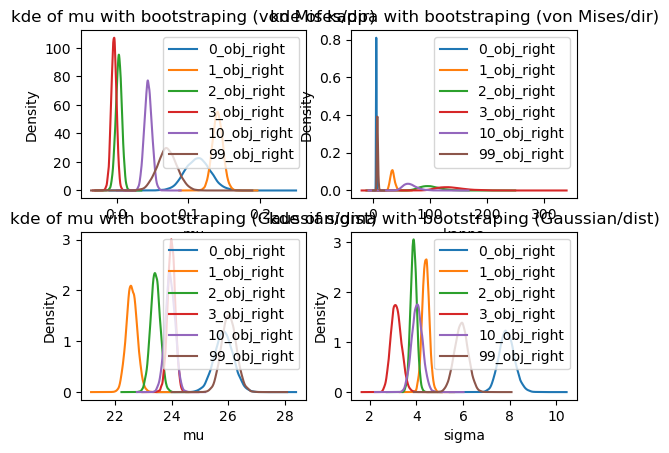

In [53]:
fig, axarr = plt.subplots(2, 2)
for ax, vari in zip(axarr[0], ["mu", "kappa"]):
    df_PI_dir.drop("mle", axis=1, level=1).loc[
        :, vari
    ].dropna().transpose().plot.kde(ax=ax)
    ax.set_xlabel(vari)
    ax.set_title(f"kde of {vari} with bootstraping (von Mises/dir)")
    # uncomment below to also plot mle over kde
    #for cond in conditions:
        #ax.axvline(df_PI_dir.loc[cond, (vari, "mle")])
        #ax.axvline(df_PI_dir.loc["flat", (vari, "mle")], c="k")
        
for ax, vari in zip(axarr[1], ["mu", "sigma"]):
    df_PI_dist.drop("mle", axis=1, level=1).loc[
        :, vari
    ].dropna().transpose().plot.kde(ax=ax)
    ax.set_xlabel(vari)
    ax.set_title(f"kde of {vari} with bootstraping (Gaussian/dist)")
    # uncomment below to also plot mle over kde
    #for cond in conditions:
        #ax.axvline(df_PI_dist.loc[cond, (vari, "mle")])
plt.show()

In [54]:
# indexing into new multiindex goes like this:
test = df_PI_dist.loc["0_obj_right", ("sigma", "mle")]

## create static landmark model

In [55]:
mu_dist = 10
# dist error spread for 1 LM
sigma_dist = np.median(df_all.groupby("ppid").err_dist_LM0.std())

## static LM model functions

In [56]:
# set up condition list
obj_to_use = {
    "0_obj_right": [0, 0],
    "1_obj_right": [0, 1],
    "2_obj_right": [0, 2],
    "3_obj_right": [0, 3],
    "10_obj_right": [0, 10],
    "99_obj_right": [0, 99],
}

In [57]:
def eval_static_lm_model():
    lm_results_dict = {}

    for cond in conditions:
        first_obj = obj_to_use[cond][0]
        last_obj = obj_to_use[cond][1]

        to_use = obj_pos.iloc[first_obj:last_obj]

        # hanlde 0 obj case
        if to_use.empty:
            print(f"skipping {cond}, because there are no objects...")
            continue

        p_dict = {}

        for index, row in to_use.iterrows():
            # get x,y of obj
            pos = row.values
            LM_num = index

            # calculate goal vector for LM
            goal_vect_LM = np.subtract(goal_pos, pos)
            goal_dist_LM, goal_ang_LM = mlutil.cart2pol(
                goal_vect_LM[0], goal_vect_LM[1]
            )

            # prep data
            data_dist = (
                df_all[df_all.trial_name == cond][f"err_dist_LM{LM_num}"]
                + goal_dist_LM
            ).to_numpy()

            # evaluate model on data
            p_gauss = models.calc_gaussian_probability_density(
                data_dist, mu_dist, sigma_dist
            )

            # save to dict
            p_dict[LM_num] = p_gauss

        # save results to dict
        lm_results_dict[cond] = p_dict
    return lm_results_dict

## evaluate static LM model

In [58]:
model_eval_lm = eval_static_lm_model()

skipping 0_obj_right, because there are no objects...


## PI model functions

In [59]:
def eval_PI_dir_model(df_PI):
    mu_0 = df_PI.loc["0_obj_right", ("mu", "mle")]
    kappa_0 = df_PI.loc["0_obj_right", ("kappa", "mle")]

    mu_flat = df_PI.loc["flat", ("mu", "mle")]
    kappa_flat = df_PI.loc["flat", ("kappa", "mle")]

    results_dict = {}
    for cond in conditions:
        p_dict = {}

        mu = df_PI.loc[cond, ("mu", "mle")]
        kappa = df_PI.loc[cond, ("kappa", "mle")]

        # fetch data
        data_ang = (
            np.deg2rad(df_all[df_all.trial_name == cond].err_dir_walk)
        ).to_numpy()

        # evaluate with current fit
        p_vm = models.calc_von_mises_probability_density(data_ang, mu, kappa)

        # evaluate with 0 object fit
        p_vm_0 = models.calc_von_mises_probability_density(
            data_ang, mu_0, kappa_0
        )

        # evaluate flat
        p_vm_flat = models.calc_von_mises_probability_density(
            data_ang, mu_flat, kappa_flat
        )

        p_dict["0_obj"] = p_vm_0
        p_dict["matched_fit"] = p_vm
        p_dict["flat"] = p_vm_flat

        results_dict[cond] = p_dict

    return results_dict

In [60]:
def eval_PI_dist_model(df_PI):
    results_dict = {}
    # Init cond 0
    mu_0 = df_PI.loc["0_obj_right", ("mu", "mle")]
    sigma_0 = df_PI.loc["0_obj_right", ("sigma", "mle")]
    for cond in conditions:
        p_dict = {}
        # fetch dist data for PI
        data_dist_PI = (
            df_all[df_all.trial_name == cond]["err_dist_walk"] + goal_dist
        ).to_numpy()

        mu = df_PI.loc[cond, ("mu", "mle")]
        sigma = df_PI.loc[cond, ("sigma", "mle")]

        # evaluate model on data
        p_fit = models.calc_gaussian_probability_density(
            data_dist_PI, mu, sigma
        )
        p_0 = models.calc_gaussian_probability_density(
            data_dist_PI, mu_0, sigma_0
        )
        p_dict["0_obj"] = p_0
        p_dict["matched_fit"] = p_fit
        results_dict[cond] = p_dict
    return results_dict

## evaluate PI models

In [61]:
model_eval_PI_dist = eval_PI_dist_model(df_PI_dist)
model_eval_PI_dir = eval_PI_dir_model(df_PI_dir)

# compare model variants

In [62]:
# format model names for latex
PI_dist_fit = "$g_{PI}^*$"
PI_dir_flat = "$f_{PI}^{flat}$"
PI_dir_fit = "$f_{PI}^*$"
PI_dir_0obj = "$f_{PI}^{*\,0objs}$"
PI_dist_0obj = "$g_{PI}^{*\,0objs}$"
LM_dist_static = "$\prod\, g_{LM}^{true-dist}$"
times = " $ \\times $ "
plus = " $ + $ "
alternation_LM_static = "$\sum\, g_{LM}^{true-dist}$"

In [63]:
def sum_probabilities(data, start_obj, end_obj):
    p_sum = np.zeros(data[0].shape)
    obj_to_use = np.arange(start_obj, end_obj)
    for obj in obj_to_use:
        p_sum += data[obj]
    return p_sum

In [64]:
def mult_probabilities(data, start_obj, end_obj):
    p_mult = np.ones(data[0].shape)
    obj_to_use = np.arange(start_obj, end_obj)
    for obj in obj_to_use:
        p_mult *= data[obj]
    return p_mult

In [65]:
def calc_ll(data):
    return np.sum(np.log(data))

In [66]:
def add_result(df, ID, data, n_params):
    df.loc[len(df.index)] = pd.Series(
        {
            "model_ID": ID,
            "log_Likelihood": calc_ll(data),
            "BIC": mcompare.calc_bic(
                log_likelihood=calc_ll(data),
                n_params=n_params,
                sample_size=len(data),
            ),
            "AIC": mcompare.calc_aic(
                log_likelihood=calc_ll(data),
                n_params=n_params,
                sample_size=len(data),
            ),
        }
    )
    return df

In [67]:
def assemble_models_0obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["0_obj_right"]["flat"]
    p_dir_fit = model_eval_PI_dir["0_obj_right"]["matched_fit"]

    p_dist = model_eval_PI_dist["0_obj_right"]["matched_fit"]

    # calc and save results

    df = add_result(df=df, ID=PI_dist_fit, data=p_dist, n_params=2)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)

    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit,
        data=p_dist * p_dir_fit,
        n_params=2 + 2,
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat,
        data=p_dist * p_dir_flat,
        n_params=2 + 2,
    )

    return df

In [68]:
def assemble_models_1obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["1_obj_right"]["flat"]
    p_dir_0obj = model_eval_PI_dir["1_obj_right"]["0_obj"]
    p_dir_fit = model_eval_PI_dir["1_obj_right"]["matched_fit"]

    p_dist_PI_0obj = model_eval_PI_dist["1_obj_right"]["0_obj"]
    p_dist_PI_fit = model_eval_PI_dist["1_obj_right"]["matched_fit"]
    p_dist_LM = mult_probabilities(model_eval_lm["1_obj_right"], 0, 1)

    # calc and save results
    df = add_result(df=df, ID=PI_dist_0obj, data=p_dist_PI_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dist_fit, data=p_dist_PI_fit, n_params=2)
    df = add_result(df=df, ID=LM_dist_static, data=p_dist_LM, n_params=2)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_0obj, data=p_dir_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)

    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (1 * 2),
    )
    return df

In [69]:
def assemble_models_2obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["2_obj_right"]["flat"]
    p_dir_0obj = model_eval_PI_dir["2_obj_right"]["0_obj"]
    p_dir_fit = model_eval_PI_dir["2_obj_right"]["matched_fit"]

    p_dist_PI_0obj = model_eval_PI_dist["2_obj_right"]["0_obj"]
    p_dist_PI_fit = model_eval_PI_dist["2_obj_right"]["matched_fit"]
    p_dist_LM = mult_probabilities(model_eval_lm["2_obj_right"], 0, 2)

    # calc and save results

    df = add_result(df=df, ID=PI_dist_0obj, data=p_dist_PI_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dist_fit, data=p_dist_PI_fit, n_params=2)
    df = add_result(df=df, ID=LM_dist_static, data=p_dist_LM, n_params=2 * 2)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_0obj, data=p_dir_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)

    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (2 * 2),
    )
    return df

In [70]:
def assemble_models_3obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["3_obj_right"]["flat"]
    p_dir_0obj = model_eval_PI_dir["3_obj_right"]["0_obj"]
    p_dir_fit = model_eval_PI_dir["3_obj_right"]["matched_fit"]

    p_dist_PI_0obj = model_eval_PI_dist["3_obj_right"]["0_obj"]
    p_dist_PI_fit = model_eval_PI_dist["3_obj_right"]["matched_fit"]
    p_dist_LM = mult_probabilities(model_eval_lm["3_obj_right"], 0, 3)

    # calc and save results

    df = add_result(df=df, ID=PI_dist_0obj, data=p_dist_PI_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dist_fit, data=p_dist_PI_fit, n_params=2)
    df = add_result(df=df, ID=LM_dist_static, data=p_dist_LM, n_params=2 * 3)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_0obj, data=p_dir_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_fit * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_fit + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_fit * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_0obj + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_0obj * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_flat + times + LM_dist_static,
        data=p_dist_PI_0obj * p_dir_flat * p_dist_LM,
        n_params=2 + 2 + (3 * 2),
    )

    return df

In [71]:
def assemble_models_10obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["10_obj_right"]["flat"]
    p_dir_0obj = model_eval_PI_dir["10_obj_right"]["0_obj"]
    p_dir_fit = model_eval_PI_dir["10_obj_right"]["matched_fit"]

    p_dist_PI_0obj = model_eval_PI_dist["10_obj_right"]["0_obj"]
    p_dist_PI_fit = model_eval_PI_dist["10_obj_right"]["matched_fit"]
    p_dist_LM = mult_probabilities(model_eval_lm["10_obj_right"], 0, 10)
    alternation_LM = sum_probabilities(model_eval_lm["10_obj_right"], 0, 10)

    # calc and save results

    df = add_result(df=df, ID=PI_dist_0obj, data=p_dist_PI_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dist_fit, data=p_dist_PI_fit, n_params=2)
    df = add_result(df=df, ID=LM_dist_static, data=p_dist_LM, n_params=2 * 10)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_0obj, data=p_dir_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)
    df = add_result(
        df=df, ID=alternation_LM_static, data=alternation_LM, n_params=10 * 2
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_fit * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_0obj + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_0obj * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_flat * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_fit + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_fit * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_0obj + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_0obj * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_flat + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_flat * alternation_LM,
        n_params=2 + 2 + (10 * 2),
    )
    return df

In [72]:
def assemble_models_99obj():
    df = pd.DataFrame(columns=["model_ID", "log_Likelihood", "BIC", "AIC"])

    # prep data
    p_dir_flat = model_eval_PI_dir["99_obj_right"]["flat"]
    p_dir_0obj = model_eval_PI_dir["99_obj_right"]["0_obj"]
    p_dir_fit = model_eval_PI_dir["99_obj_right"]["matched_fit"]

    p_dist_PI_0obj = model_eval_PI_dist["99_obj_right"]["0_obj"]
    p_dist_PI_fit = model_eval_PI_dist["99_obj_right"]["matched_fit"]
    p_dist_LM = mult_probabilities(model_eval_lm["99_obj_right"], 0, 99)
    alternation_LM = sum_probabilities(model_eval_lm["99_obj_right"], 0, 99)

    # calc and save results

    df = add_result(df=df, ID=PI_dist_0obj, data=p_dist_PI_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dist_fit, data=p_dist_PI_fit, n_params=2)
    df = add_result(df=df, ID=LM_dist_static, data=p_dist_LM, n_params=2 * 99)
    df = add_result(df=df, ID=PI_dir_flat, data=p_dir_flat, n_params=2)
    df = add_result(df=df, ID=PI_dir_0obj, data=p_dir_0obj, n_params=2)
    df = add_result(df=df, ID=PI_dir_fit, data=p_dir_fit, n_params=2)
    df = add_result(
        df=df, ID=alternation_LM_static, data=alternation_LM, n_params=99 * 2
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_fit + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_fit * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_0obj + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_0obj * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_fit + times + PI_dir_flat + times + alternation_LM_static,
        data=p_dist_PI_fit * p_dir_flat * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_fit + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_fit * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_0obj + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_0obj * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )
    df = add_result(
        df=df,
        ID=PI_dist_0obj + times + PI_dir_flat + times + alternation_LM_static,
        data=p_dist_PI_0obj * p_dir_flat * alternation_LM,
        n_params=2 + 2 + (99 * 2),
    )

    return df

## assemble comparison tables

In [73]:
res_0obj = assemble_models_0obj()
res_1obj = assemble_models_1obj()
res_2obj = assemble_models_2obj()
res_3obj = assemble_models_3obj()
res_10obj = assemble_models_10obj()
res_99obj = assemble_models_99obj()

sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.
sample size was < 100 or n_params was > 5, using bias-corrected AIC variant.

C:\Users\jscherer1\AppData\Local\Temp\ipykernel_13516\2991825711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(data))


# bootstrapping stats

In [74]:
def calc_bootstrap_pval(data, val):
    """
    Calculate the p-value for the hypothesis that "val" is not different from
    the mean of the bootstrapped distribution.

    Parameters
    ----------
    data : (N,1) array-like
        the bootstrapped distribution.
    val : scalar
        the value to check against the mean.

    Returns
    -------
    scalar
        the p-value for the given val.

    """
    mu = np.mean(data)
    dist = np.abs(mu - val)
    return np.sum(np.abs(data - mu) > dist) / len(data)

In [75]:
def check_against_bootstrap_confint(df, cond, param, val):
    ci_ll = df.loc[cond, (param, "low")]
    ci_ul = df.loc[cond, (param, "high")]
    mle = df.loc[cond, (param, "mle")]
    if val > ci_ll and val < ci_ul:
        print(
            f"{val:0.3f} was NOT outside of CI: [{ci_ll:0.3f},{ci_ul:0.3f}] for '{param}' with mle={mle:0.3f} in '{cond}'"
        )
    else:
        print(
            f"{val:0.3f} was outside of CI: [{ci_ll:0.3f},{ci_ul:0.3f}] for '{param}' with mle={mle:0.3f} in '{cond}'"
        )

# plotting functions

In [76]:
def plot_estimates(ax, df, param, func=lambda x: x):
    ci_ll = []
    ci_ul = []
    mle = []
    # loop through conditions
    for cond in conditions:
        ci_ll.append(df.loc[cond, (param, "low")])
        ci_ul.append(df.loc[cond, (param, "high")])
        mle.append(df.loc[cond, (param, "mle")])

    # transform to np
    ci_ll = np.array(ci_ll)
    ci_ul = np.array(ci_ul)
    mle = np.array(mle)

    # apply conversion
    mle = func(mle)
    ci_ll = func(ci_ll)
    ci_ul = func(ci_ul)

    # define errs
    low = np.abs(ci_ll - mle)
    high = np.abs(ci_ul - mle)

    # do plotting
    ax.errorbar(
        np.arange(0, 6),
        mle,
        yerr=[low, high],
        color="k",
        fmt="o",
        markersize="8",
        ecolor="k",
        capsize=6,
        elinewidth=2.5,
    )
    
    return ci_ll, ci_ul

In [77]:
def format_subplot(ax, suptitle, ylabel):
    ax.set_title(suptitle)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(conditions)))
    #ax.set_xticklabels(conditions, rotation=45)
    ax.set_xticklabels([0,1,2,3,10,99])

In [78]:
def kappa_to_circ_std(kappa):
    # as per Zhao & Warren 2015
    sigma = np.sqrt(2 * (1 - i1(kappa) / i0(kappa)))
    return sigma

In [79]:
def kappafunc(kappa):
    # as per Murray & Morgenstern, 2010
    sigma_rad = np.sqrt(1 / kappa)
    sigma_deg = np.rad2deg(sigma_rad)

    return sigma_deg

## Figure 9

distance: low CIs: [25.18320475 22.23373628 23.08811925 23.70692163 23.60431442 25.53325606]
distance: high CIs: [26.49471846 22.96093501 23.74212502 24.23758844 24.28105319 26.54019528]
direction: low CIs: [ 4.61671866  7.27310457 -0.33332867 -0.67939682  1.96391405  2.54329761]
direction: high CIs: [8.46583485 8.91124857 0.63299315 0.17407837 3.13528881 5.62815585]


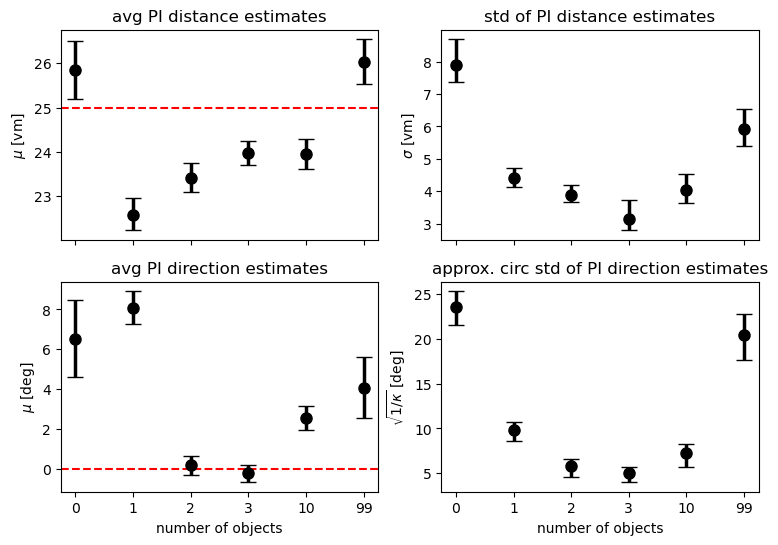

In [80]:
fig, axarr = plt.subplots(2, 2, sharex=True)
fig.name = "mle estimates overview"

ax1 = axarr[0, 0]
low_ci, high_ci = plot_estimates(ax1, df_PI_dist, "mu")
print("distance: low CIs: " + str(low_ci) + "\ndistance: high CIs: " + str(high_ci))
format_subplot(ax1, "avg PI distance estimates", r"$\mu$ [vm]")
ax1.axhline(25, ls="--", c="r")
ax2 = axarr[0, 1]
plot_estimates(ax2, df_PI_dist, "sigma")
format_subplot(ax2, "std of PI distance estimates", r"$\sigma$ [vm]")
ax3 = axarr[1, 0]
low_ci, high_ci = plot_estimates(ax3, df_PI_dir, "mu", np.rad2deg)
print("direction: low CIs: " + str(low_ci) + "\ndirection: high CIs: " + str(high_ci))
format_subplot(ax3, "avg PI direction estimates", r"$\mu$ [deg]")
ax3.axhline(0, ls="--", c="r")  #
ax3.set_xlabel("number of objects")
ax4 = axarr[1, 1]
plot_estimates(ax4, df_PI_dir, "kappa", kappafunc)
format_subplot(
    ax4,
    "approx. circ std of PI direction estimates",
    r"$\sqrt{1/\kappa}$ [deg]",
)
ax4.set_xlabel("number of objects")
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig.set_figheight(600*px)
fig.set_figwidth(900*px)

plt.show()

place_holder = "{}"
filename = f"figure_9.{place_holder}"
fig.savefig(fig_save_path + filename.format("svg"))
fig.savefig(fig_save_path + filename.format("png"))
fig.savefig(fig_save_path + filename.format("pdf"))
fig.savefig(fig_save_path + filename.format("tiff"), dpi=300)

# print tables (supplement tables in paper)

In [81]:
res_0obj

model_ID log_Likelihood          BIC  \
0                             $g_{PI}^*$   -1902.676064  3817.957366   
1                        $f_{PI}^{flat}$   -1003.480817  2019.566871   
2                             $f_{PI}^*$    -304.072987   620.751211   
3       $g_{PI}^*$ $ \times $ $f_{PI}^*$   -2206.749051  4438.708577   
4  $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$    -2906.15688  5837.524237   

           AIC  
0  3809.352128  
1  2010.961633  
2   612.145973  
3  4421.498101  
4  5820.313761

In [82]:
res_1obj

model_ID log_Likelihood  \
0                                 $g_{PI}^{*\,0objs}$   -1767.599476   
1                                          $g_{PI}^*$   -1590.347203   
2                        $\prod\, g_{LM}^{true-dist}$    -1344.10604   
3                                     $f_{PI}^{flat}$   -1007.156566   
4                                 $f_{PI}^{*\,0objs}$     -78.401112   
5                                          $f_{PI}^*$     185.072326   
6   $g_{PI}^*$ $ \times $ $f_{PI}^*$ $ \times $ $\...   -2749.380918   
7   $g_{PI}^*$ $ \times $ $f_{PI}^{*\,0objs}$ $ \t...   -3012.854355   
8   $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$ $ \times...   -3941.609809   
9   $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^*$ $ \t...   -2926.633191   
10  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{*\,0ob...   -3190.106628   
11  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{flat}$...   -4118.862082   

            BIC          AIC  
0   3547.811502  3539.198952  
1   3193.306956  3184.694405  
2   2700.824631  2692.212081  
3   2026.925683  2018.313132  
4    169.414774   160.802224  
5     -357.5321  -366.144651  
6   5536.599487  5510.917103  
7   6063.546362  6037.863978  
8    7921.05727  7895.374886  
9   5891.104033   5865.42165  
10  6418.050908  6392.368524  
11  8275.561817  8249.879433

In [83]:
res_2obj

model_ID log_Likelihood  \
0                                 $g_{PI}^{*\,0objs}$   -1731.152742   
1                                          $g_{PI}^*$   -1525.184777   
2                        $\prod\, g_{LM}^{true-dist}$   -2612.622526   
3                                     $f_{PI}^{flat}$   -1008.994442   
4                                 $f_{PI}^{*\,0objs}$     -65.615672   
5                                          $f_{PI}^*$     476.235124   
6   $g_{PI}^*$ $ \times $ $f_{PI}^*$ $ \times $ $\...   -3661.572179   
7   $g_{PI}^*$ $ \times $ $f_{PI}^{*\,0objs}$ $ \t...   -4203.422976   
8   $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$ $ \times...   -5146.801745   
9   $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^*$ $ \t...   -3867.540144   
10  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{*\,0ob...   -4409.390941   
11  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{flat}$...    -5352.76971   

             BIC           AIC  
0    3474.921682   3466.305485  
1    3062.985751   3054.369555  
2    5250.477446   5233.245052  
3     2030.60508   2021.988883  
4     143.847542    135.231345  
5    -939.854051   -948.470248  
6    7373.609146   7339.411025  
7    8457.310739   8423.112618  
8   10344.068277  10309.870156  
9    7785.545076   7751.346955  
10   8869.246669   8835.048548  
11  10756.004208  10721.806087

In [84]:
res_3obj

model_ID log_Likelihood  \
0                                 $g_{PI}^{*\,0objs}$   -1691.172775   
1                                          $g_{PI}^*$   -1403.116286   
2                        $\prod\, g_{LM}^{true-dist}$    -4033.60494   
3                                     $f_{PI}^{flat}$   -1005.318688   
4                                 $f_{PI}^{*\,0objs}$     -63.546102   
5                                          $f_{PI}^*$     559.056697   
6   $g_{PI}^*$ $ \times $ $f_{PI}^*$ $ \times $ $\...   -4877.664529   
7   $g_{PI}^*$ $ \times $ $f_{PI}^{*\,0objs}$ $ \t...   -5500.267328   
8   $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$ $ \times...   -6442.039914   
9   $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^*$ $ \t...   -5165.721018   
10  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{*\,0ob...   -5788.323817   
11  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{flat}$...   -6730.096403   

             BIC           AIC  
0    3394.954448    3386.34555  
1     2818.84147   2810.232572  
2    8105.036573   8079.365435  
3    2023.246273   2014.637376  
4     139.701101    131.092203  
5   -1105.504496  -1114.113394  
6    9818.373546   9775.739506  
7   11063.579143  11020.945103  
8   12947.124316  12904.490275  
9   10394.486524  10351.852484  
10  11639.692121  11597.058081  
11  13523.237294  13480.603253

In [85]:
res_10obj

model_ID log_Likelihood  \
0                                 $g_{PI}^{*\,0objs}$   -1732.738429   
1                                          $g_{PI}^*$   -1551.432482   
2                        $\prod\, g_{LM}^{true-dist}$  -41593.093576   
3                                     $f_{PI}^{flat}$   -1012.670196   
4                                 $f_{PI}^{*\,0objs}$     -62.925926   
5                                          $f_{PI}^*$     359.591646   
6                         $\sum\, g_{LM}^{true-dist}$    -423.043051   
7   $g_{PI}^*$ $ \times $ $f_{PI}^*$ $ \times $ $\...   -1614.883887   
8   $g_{PI}^*$ $ \times $ $f_{PI}^{*\,0objs}$ $ \t...   -2037.401459   
9   $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$ $ \times...   -2987.145729   
10  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^*$ $ \t...   -1796.189834   
11  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{*\,0ob...   -2218.707406   
12  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{flat}$...   -3168.451676   

             BIC           AIC  
0    3478.100327   3469.476858  
1    3115.488434   3106.864964  
2   83312.421848  83227.772058  
3    2037.963861   2029.340392  
4     138.475323    129.851853  
5    -706.559822   -715.183292  
6     972.320798    887.671008  
7    3381.249409   3280.049143  
8    4226.284554   4125.084288  
9    6125.773093   6024.572826  
10   3743.861303   3642.661037  
11   4588.896448   4487.696182  
12   6488.384987    6387.18472

In [86]:
res_99obj

model_ID log_Likelihood  \
0                                 $g_{PI}^{*\,0objs}$   -1732.010414   
1                                          $g_{PI}^*$   -1696.021331   
2                        $\prod\, g_{LM}^{true-dist}$           -inf   
3                                     $f_{PI}^{flat}$    -974.074784   
4                                 $f_{PI}^{*\,0objs}$      -231.0575   
5                                          $f_{PI}^*$    -215.493402   
6                         $\sum\, g_{LM}^{true-dist}$      56.782337   
7   $g_{PI}^*$ $ \times $ $f_{PI}^*$ $ \times $ $\...   -1854.732397   
8   $g_{PI}^*$ $ \times $ $f_{PI}^{*\,0objs}$ $ \t...   -1870.296495   
9   $g_{PI}^*$ $ \times $ $f_{PI}^{flat}$ $ \times...   -2613.313778   
10  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^*$ $ \t...    -1890.72148   
11  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{*\,0ob...   -1906.285578   
12  $g_{PI}^{*\,0objs}$ $ \times $ $f_{PI}^{flat}$...   -2649.302861   

            BIC          AIC  
0   3476.566582  3468.020828  
1   3404.588417  3396.042663  
2           inf          inf  
3   1960.695321  1952.149567  
4    474.660755   466.115001  
5    443.532559   434.986805  
6   1128.464974   520.513876  
7   4976.585949  4364.266017  
8   5007.714145  4395.394213  
9   6493.748712   5881.42878  
10  5048.564115  4436.244183  
11  5079.692311  4467.372379  
12  6565.726877  5953.406945